In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time
from matplotlib.animation import FuncAnimation
# from PIL import Image

class SpectrumEnvironment:
    # def __init__(self, num_bands=10,steps=1):
    #     self.num_bands = num_bands  # Total number of frequency bands
    #     self.steps = steps
    #     self.channel_history = [[] for _ in range(num_bands)]  # Store states for each channel
    #     self.state = self._generate_spectrum_state()  # Current state of the spectrum
    #     self.total_reward = 0  # Track total reward
    #     self.rewards = []  # Track rewards for each step
    #     self.energy_costs = []
    def __init__(self, num_bands=10, steps=1):
        self.num_bands = num_bands  # Total number of frequency bands
        self.steps = steps
        self.channel_history = [[] for _ in range(num_bands)]  # Store states for each channel
        self.total_reward = 0  # Track total reward
        self.rewards = []  # Track rewards for each step
        self.energy_costs = []
        
        # Default signal function
        self.default_signal_function = lambda t, band: 0.5 + 0.5 * np.sin(2 * np.pi * t / 24)

        # Initialize the spectrum state with the default signal function
        self.state = self._generate_spectrum_state(self.default_signal_function)

    # def _generate_spectrum_state(self):
    #     """
    #     Generate a spectrum state that mimics a real environment.
    #     Each band can be idle (0) or occupied (1), with temporal dependencies based on real time.
    #     """
    #     # Temporal dependency weights for past states (e.g., decaying influence)
    #     temporal_weights = [0.5, 0.3, 0.2]  # Adjust these based on desired dependency
    
    #     # Generate new state based on channel history
    #     new_state = []
    #     for band in range(self.num_bands):
    #         # Retrieve recent history of the channel
    #         history = self.channel_history[band][-len(temporal_weights):]
    
    #         # Calculate the weighted influence of past states
    #         weighted_sum = sum(weight * state for weight, state in zip(temporal_weights, history[::-1]))
    
    #         # Apply a threshold to decide the next state
    #         base_probability = weighted_sum / sum(temporal_weights)
    
    #         # Add noise to simulate external interference
    #         noise = np.random.uniform(-0.1, 0.1)
    
    #         # Compute the final probability for being occupied (1)
    #         probability_occupied = min(max(base_probability + noise, 0), 1)
    
    #         # Determine the new state (1 = occupied, 0 = idle)
    #         new_state.append(1 if np.random.rand() < probability_occupied else 0)
    
    #     # Dynamically calculate activity level based on real-time step influence
    #     current_step = int(time.time() // self.steps)  # Divide real-time by steps
    #     activity_level = 0.5 + 0.5 * np.sin((2 * np.pi * current_step) / (24 / self.steps))  # Adjust for temporal dynamics
    #     busy_threshold = 0.7  # Threshold for busy state
    #     if activity_level > busy_threshold:
    #         new_state = [1 if np.random.rand() < 0.6 else state for state in new_state]
    
    #     # Return the new state and update the history
    #     self.state = np.array(new_state)
    #     return self.state

    def _generate_spectrum_state(self, signal_function):
        """
        Generate a spectrum state that mimics a real environment.
        Each band can be idle (0) or occupied (1) based on a generalized signal function.
        
        Args:
            signal_function (function): A function f(t, band) defining the signal dynamics based on time t and band index.
        """
        # Get the current time step
        t = int(time.time() // self.steps)  # Divide real-time by steps

        # Generate the new state for each band
        new_state = []
        for band in range(self.num_bands):
            # Calculate the activity level for the current band at time t using the signal function
            activity_level = signal_function(t, band)

            # Clamp the activity level to ensure it's within a valid range [0, 1]
            activity_level = max(0, min(activity_level, 1))

            # Add noise to simulate external interference
            noise = np.random.uniform(-0.1, 0.1)

            # Compute the final probability for being occupied (1)
            probability_occupied = min(max(activity_level + noise, 0), 1)

            # Determine the new state (1 = occupied, 0 = idle)
            new_state.append(1 if np.random.rand() < probability_occupied else 0)

        # Update the state
        self.state = np.array(new_state)
        return self.state




    # def energy_detection(self, band):
    #     """
    #     Simulates energy detection for a specific band.
    #     Considers energy consumption based on sensing history.
    #     """
    #     noise_level = random.uniform(0, 1)  # Simulate noise
    #     signal_level = random.uniform(0, 2) if self.state[band] == 1 else random.uniform(0, 0.5)
    #     detected_energy = signal_level + noise_level
    #     threshold = 1.0  # Energy threshold for detection
        
    #     # Energy consumption increases with history length
    #     sensing_history_length = len(self.channel_history[band])
    #     energy_consumption = 0.1 + 0.01 * sensing_history_length  # Base + history penalty
    #     return detected_energy < threshold, energy_consumption

    def energy_detection(self, band):
        """
        Simulates energy detection for a specific band.
        Considers energy consumption based on sensing history and adaptive threshold.
        """
        # Simulate noise and signal levels
        noise_level = random.uniform(0, 1)  # Simulated noise
        signal_level = random.uniform(0, 2) if self.state[band] == 1 else random.uniform(0, 0.5)
        detected_energy = signal_level + noise_level

        # Adaptive threshold based on noise level and sensing history
        sensing_history_length = len(self.channel_history[band])
        average_noise = sum(self.channel_history[band]) / sensing_history_length if sensing_history_length > 0 else noise_level
        threshold = average_noise + 0.5 + 0.1 * sensing_history_length  # Adaptive threshold

        # Calculate energy consumption
        energy_consumption = 0.1 + 0.01 * sensing_history_length  # Base + history penalty

        # Return detection result and energy consumption
        return detected_energy < threshold, energy_consumption



    # def matched_filter_fft(self, band):
    #     """
    #     Simulates matched filter detection using FFT.
    #     Considers higher energy consumption than energy detection.
    #     """
    #     signal_pattern = np.fft.fft(np.random.randn(10))  # Random pattern
    #     detected_signal = np.fft.fft(np.random.randn(10) + (self.state[band] * np.random.rand(10)))
    #     correlation = np.abs(np.dot(signal_pattern.conj(), detected_signal))
    #     threshold = 15  # Correlation threshold
        
    #     # Matched filtering has higher energy cost
    #     sensing_history_length = len(self.channel_history[band])
    #     energy_consumption = 0.2 + 0.02 * sensing_history_length  # Higher base + history penalty
    #     return correlation < threshold, energy_consumption

    def matched_filter_fft(self, band):
        """
        Simulates matched filter detection using FFT with adaptive threshold.
        Considers higher energy consumption than energy detection.
        """
        # Generate signal pattern and detected signal using FFT
        signal_pattern = np.fft.fft(np.random.randn(10))  # Random pattern
        detected_signal = np.fft.fft(np.random.randn(10) + (self.state[band] * np.random.rand(10)))

        # Calculate correlation
        correlation = np.abs(np.dot(signal_pattern.conj(), detected_signal))

        # Adaptive threshold based on historical correlation
        sensing_history_length = len(self.channel_history[band])
        if sensing_history_length > 0:
            avg_correlation = sum(self.channel_history[band]) / sensing_history_length
        else:
            avg_correlation = correlation  # Use current value if history is empty

        threshold = avg_correlation + 5 + 0.5 * sensing_history_length  # Adaptive threshold adjustment

        # Matched filtering has higher energy cost
        energy_consumption = 0.2 + 0.02 * sensing_history_length  # Higher base + history penalty

        # Update channel history for future threshold adaptation
        self.channel_history[band].append(correlation)

        # Return detection result and energy consumption
        return correlation < threshold, energy_consumption



    # def cyclostationary_detection(self, band):
    #     """
    #     Simulates cyclostationary feature detection for periodic properties.
    #     Has moderate energy consumption.
    #     """
    #     periodic_property = random.uniform(0, 1) if self.state[band] == 0 else random.uniform(0.5, 1.5)
    #     threshold = 0.7
    
    #     # Cyclostationary detection consumes moderate energy
    #     sensing_history_length = len(self.channel_history[band])
    #     energy_consumption = 0.15 + 0.015 * sensing_history_length  # Moderate base + history penalty
    #     return periodic_property < threshold, energy_consumption


    def step(self, action, method="ED"):
        """
        Simulate sensing a specific band with advanced detection techniques.
        Deduct energy consumption from the reward.
        
        Parameters:
        action(int) : Band/Channel
        method(string) : 'ED' for Energy Detection(Default) or 'C' for Cyclostationary or 'MF' for Matched Filter
        """
        reward = 0
    
        # Call the appropriate detection method
        if method == "ED":
            hole_detected, energy_consumption = self.energy_detection(action)
        elif method == "C":
            hole_detected, energy_consumption = self.cyclostationary_detection(action)
        elif method == "MF":
            hole_detected, energy_consumption = self.matched_filter_fft(action)
        else:
            raise ValueError("Invalid detection method")
        
        self.energy_costs.append(energy_consumption*10)
        # Reward for sensing
        if hole_detected and self.state[action] == 0:
            reward = 30
        elif not hole_detected and self.state[action] == 1:
            reward = 5
        else:
            reward = -15
    
        # Deduct energy consumption penalty
        reward -= energy_consumption*10  # Scale energy cost penalty
    
        self.total_reward += reward
        self.rewards.append(reward)
    
        # Record the current state in the history
        for i in range(self.num_bands):
            self.channel_history[i].append(self.state[i])
    
        # Randomize the spectrum state for the next step
        self.state = self._generate_spectrum_state()
        return self.state, reward

    def reset(self):
        """Reset the environment to an initial state."""
        self.state = self._generate_spectrum_state()
        self.total_reward = 0
        self.rewards = []
        return self.state
    



In [10]:
# Initialize the environment
steps = 50
env = SpectrumEnvironment(num_bands=10,steps=steps)
selected_bands = np.random.choice(range(env.num_bands), steps, replace=True)
states_over_time = []
actions_over_time = []

# Run the environment over 10 steps
for step in range(steps):
    selected_band = selected_bands[step]
    actions_over_time.append(selected_band)
    state, reward = env.step(selected_band,method="ED")
    states_over_time.append(state)
    
# env.reset()
# Visualization
# Initialize figure
fig, ax = plt.subplots(figsize=(8, 4))

# Animation setup
bars = ax.bar(range(env.num_bands), [0] * env.num_bands, color='gray', alpha=0.5, edgecolor='black', linewidth=1)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_ylim(-1.5, 1.5)
ax.set_xticks(range(env.num_bands))
ax.set_xlabel("Channel")
ax.set_ylabel("State (1: Empty, -1: Occupied)")
ax.set_title("Channel States Over Time")

# Update function for animation
def update(step):
    ax.set_title(f"Timestep {step + 1}: Channel States (Red: Occupied, Green: Empty, Orange: Selected)")
    state = states_over_time[step]
    action = actions_over_time[step]
    for band, bar in enumerate(bars):
        y = -1 if state[band] == 0 else 1
        color = 'green' if state[band] == 0 else 'red'
        if band == action:
            color = 'orange'
        bar.set_height(y)
        bar.set_color(color)

# Create animation
anim = FuncAnimation(fig, update, frames=steps, interval=200)

# Save animation as .gif
gif_path = "channel_states.gif"
anim.save(gif_path, writer="pillow")
print(f"Animation saved as {gif_path}")

TypeError: SpectrumEnvironment._generate_spectrum_state() missing 1 required positional argument: 'signal_function'

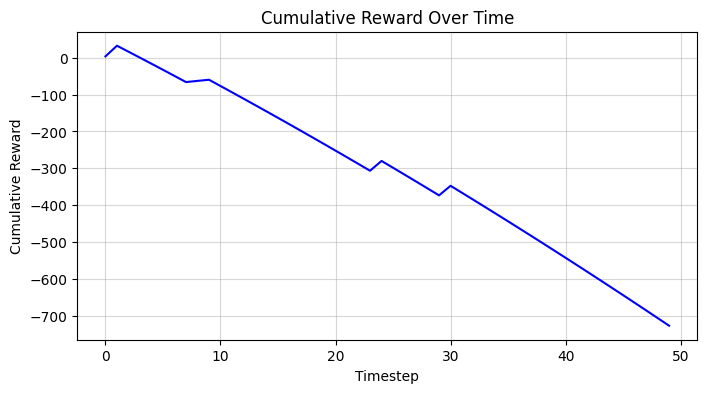

In [ ]:
# Calculate cumulative reward
cumulative_rewards = np.cumsum(env.rewards)

# Plot cumulative reward
plt.figure(figsize=(8, 4))
plt.plot(range(steps), cumulative_rewards,linestyle='-', color='blue')
plt.title("Cumulative Reward Over Time")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Reward")
plt.grid(alpha=0.5)
plt.show()


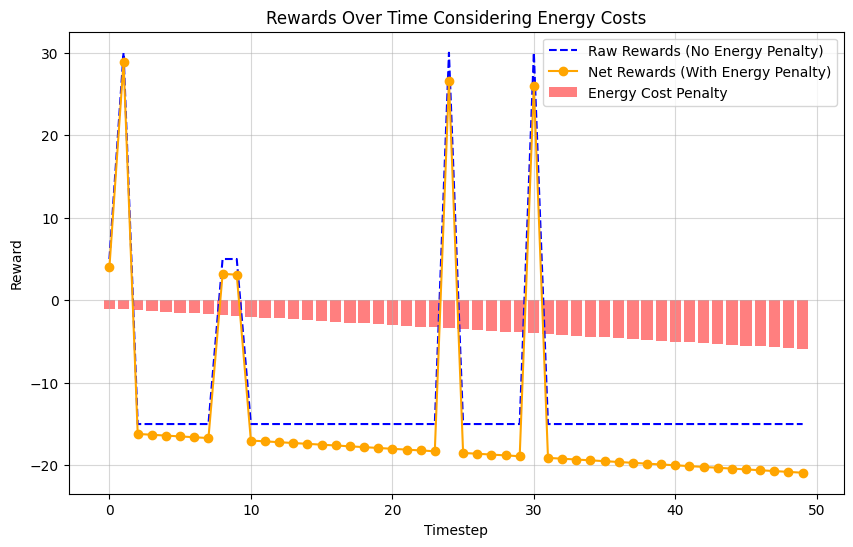

In [ ]:
# Example reward comparison with energy costs
raw_rewards = [r + energy for r, energy in zip(env.rewards, env.energy_costs)]  # Without penalty
net_rewards = env.rewards  # With penalty

plt.figure(figsize=(10, 6))
plt.plot(range(len(raw_rewards)), raw_rewards, label="Raw Rewards (No Energy Penalty)", linestyle="--", color="blue")
plt.plot(range(len(net_rewards)), net_rewards, label="Net Rewards (With Energy Penalty)", marker="o", color="orange")
plt.bar(range(len(env.energy_costs)), [-e for e in env.energy_costs], label="Energy Cost Penalty", alpha=0.5, color="red")
plt.title("Rewards Over Time Considering Energy Costs")
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


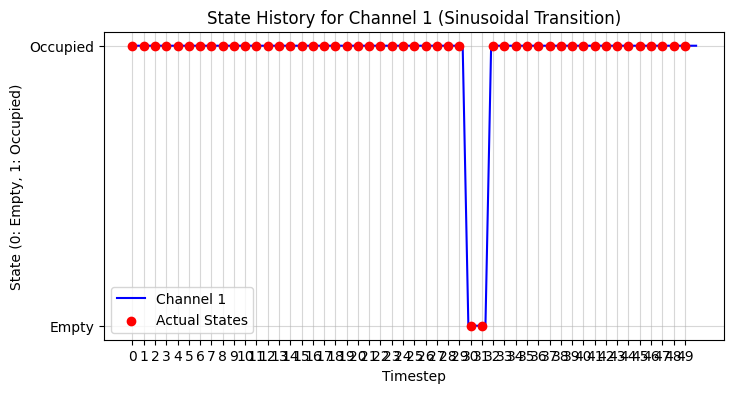

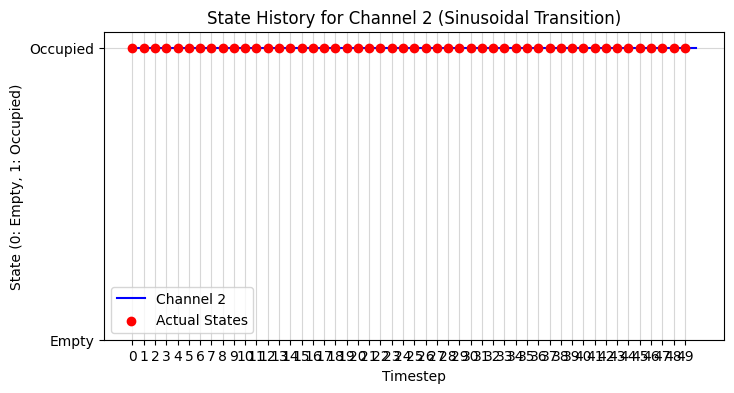

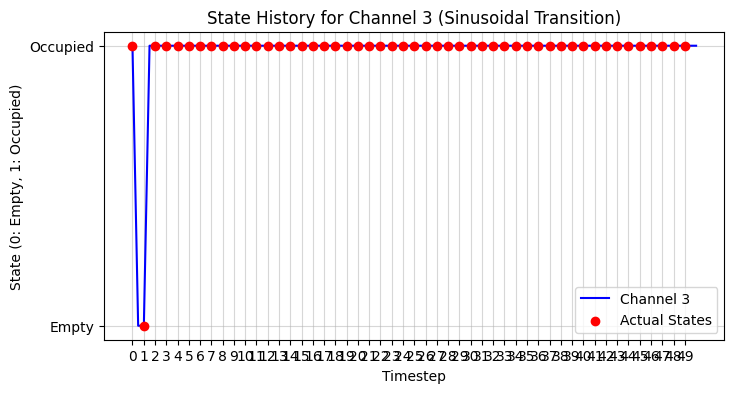

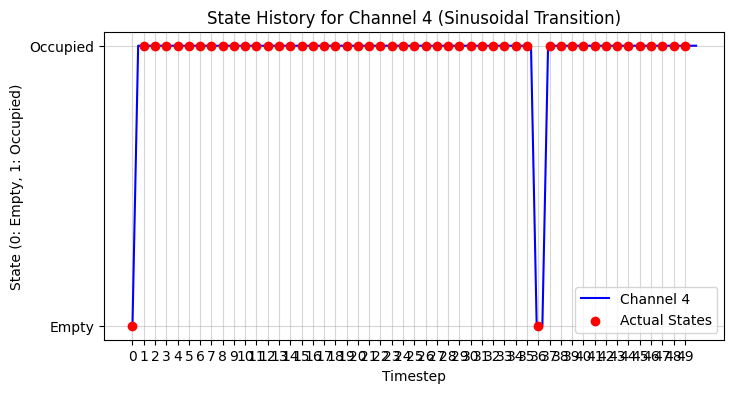

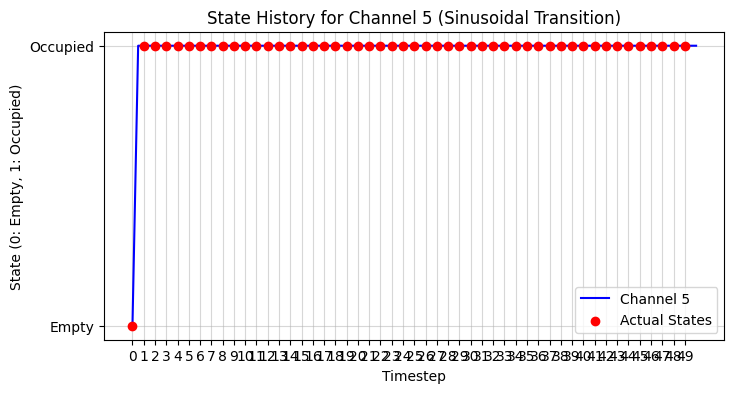

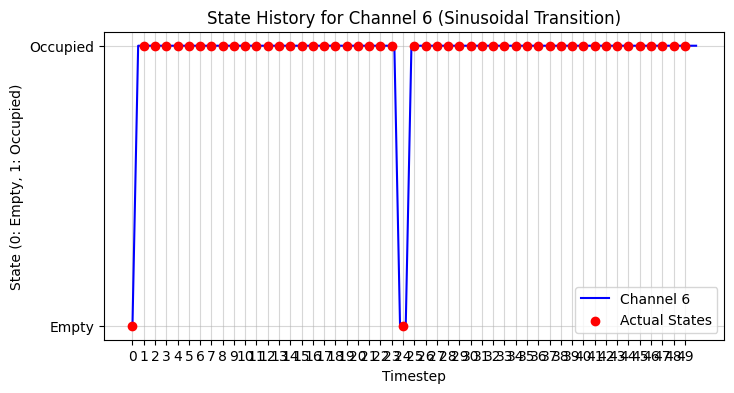

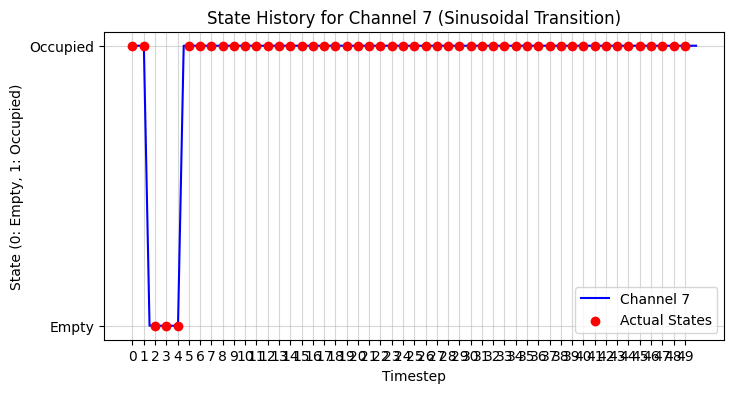

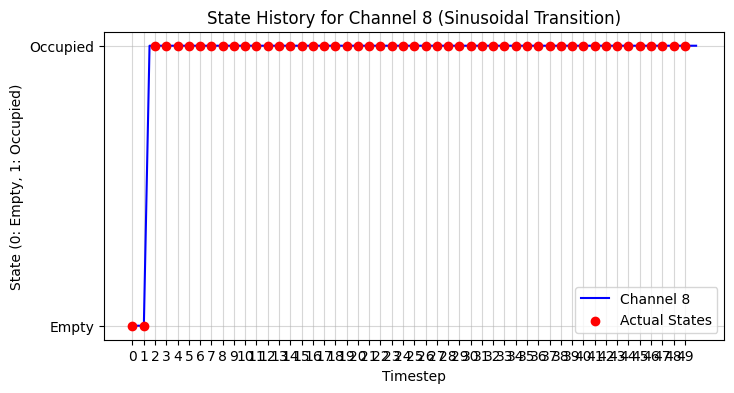

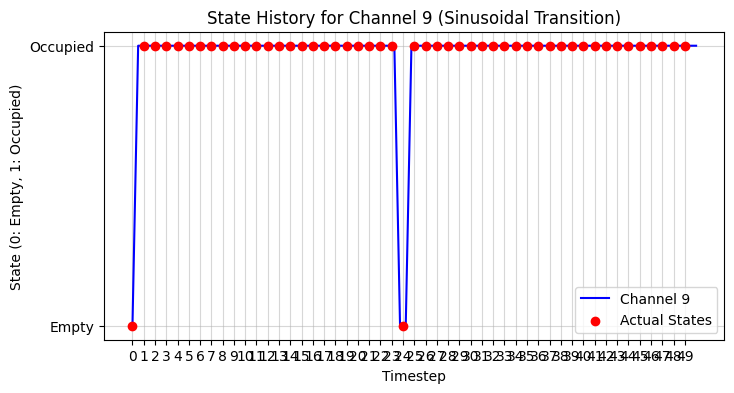

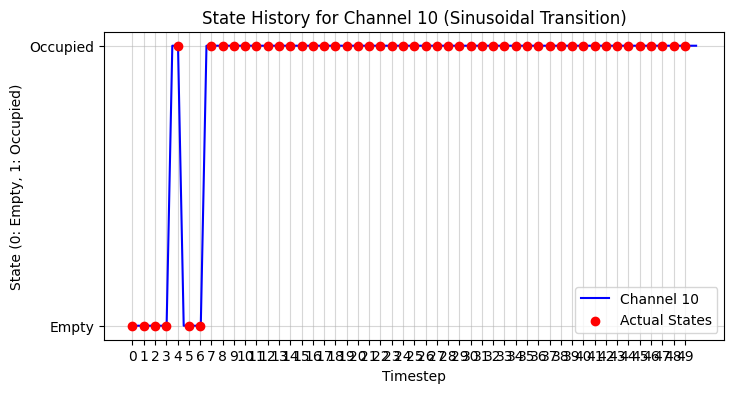

In [ ]:
# Visualization with sinusoidal transitions
time_per_step = 2  # Number of points per step for smooth transitions
total_points = steps * time_per_step  # Total points for the plot

for band, history in enumerate(env.channel_history):
    plt.figure(figsize=(8, 4))

    # Generate sinusoidal transitions
    x_points = np.linspace(0, steps, total_points)
    y_points = []
    for i in range(len(history[:steps])):
        start = history[i]
        end = history[i + 1] if i + 1 < len(history) else history[i]
        t = np.linspace(0, 1, time_per_step)
        y_points.extend(start + (end - start) * 0.5 * (1 - np.cos(np.pi * t)))

    # Plot the sinusoidal curve
    plt.plot(x_points, y_points, label=f"Channel {band + 1}", marker=None, color='blue')

    # Add step markers for actual states
    plt.scatter(range(steps), history[:steps], color='red', zorder=5, label="Actual States")

    plt.title(f"State History for Channel {band + 1} (Sinusoidal Transition)")
    plt.xlabel("Timestep")
    plt.ylabel("State (0: Empty, 1: Occupied)")
    plt.xticks(range(steps))
    plt.yticks([0, 1], labels=["Empty", "Occupied"])
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()
